In [1]:
import os
import pandas as pd
import argus_shapes as shapes
import matplotlib.pyplot as plt
%matplotlib inline

/home/mbeyeler/anaconda3/lib/python3.5/site-packages/skvideo/__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)
2018-12-14 13:51:45,183 [pulse2percept] [INFO] Welcome to pulse2percept


In [2]:
datafolder = os.environ['DATA_ROOT'] if 'DATA_ROOT' in os.environ else os.path.join('..', 'data')

In [3]:
subjectdata = shapes.load_subjects(os.path.join(datafolder, 'argus_shapes', 'subjects.csv'))
subjectdata['scale'] = pd.Series([0.75, 0.75, 1.5, 0.5], index=subjectdata.index)
subjects = subjectdata.index.sort_values()

In [4]:
subject = 'S4'

In [5]:
Xy = shapes.load_data(os.path.join(datafolder, 'argus_shapes', 'drawings_single.csv'),
                      subject=subject, electrodes=['A7', 'F8', 'F10', 'B9', 'E3'])
y = Xy[['electrode', 'image', 'area', 'orientation', 'eccentricity']]
X = Xy.drop(columns=y.columns)
X['electrode'] = y['electrode']
print('Features:', X.shape, 'Targets:', y.shape)

Features: (25, 12) Targets: (25, 5)


In [6]:
model = shapes.models.AxonMapModel(rho=437, axlambda=1420)

In [7]:
model.fit(X)

AxonMapModel(ax_segments_range=(3, 50), axlambda=1420, axon_pickle='axons.pickle',
    axons_range=(-180, 180), engine='joblib', greater_is_better=False,
    img_thresh=0.60653065971263342, implant_rot=0,
    implant_type=<class 'pulse2percept.implants.ArgusII'>, implant_x=0,
    implant_y=0, loc_od_x=15.5, loc_od_y=1.5, n_ax_segments=500,
    n_axons=500, n_jobs=-1, name='Axon map', rho=437,
    scheduler='threading', xrange=(-30, 30), xystep=0.2, yrange=(-20, 20))

In [8]:
y_pred = model.predict(X)
y_pred['subject'] = subject
y_pred['img_shape'] = X['img_shape']

In [9]:
print('Shape descriptor loss:', model.score(X, y))

Shape descriptor loss: 5.60208536335


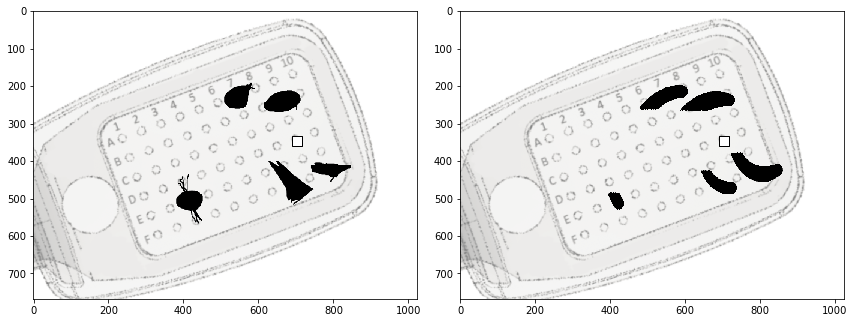

In [10]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
shapes.viz.plot_phosphenes_on_array(axes[0], subject, Xy, subjectdata)
shapes.viz.plot_phosphenes_on_array(axes[1], subject, y_pred, subjectdata)
fig.tight_layout()